In [65]:
from __future__ import division

In [66]:
import glob

In [67]:
import scipy

In [68]:
import numpy as np

In [69]:
from numpy import *

In [70]:
import matplotlib.pyplot as plt

In [71]:
import pandas as pd

In [72]:
import re

In [73]:
from scipy import optimize as sp

In [74]:
import os

In [75]:
from os import path

In [76]:
import csv

In [77]:
directory = "/Users/sararodriguez/Desktop/LAB/*.csv"

In [78]:
datafiles = []

In [79]:
datafiles.append(glob.glob(directory))

In [80]:
datafiles[0]

['/Users/sararodriguez/Desktop/LAB/F001YQ0_Results.csv']

In [81]:
def fitting(x, x0, L, R, slope):
    return L-((L-R)/(1+exp((-x+x0)/slope)))

In [82]:
# len('/Users/marie/Documents/Projects/morph_project/data/pilot/sex_morph/sex_morph_results_20190619_1846/csv-results-files/CSV_Files/csvFile for')
# name = datafiles[0][0][139:-4]
# name

In [83]:
# plot function

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


def plotting(popt, steps, continuum, continuumname, name):
    popt, pcov = scipy.optimize.curve_fit(fitting, running_mean(steps,2), running_mean(continuum,2))#, bounds=(0,[10,1,1,inf]))
    plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
    plt.plot(steps, continuum)
    plt.ylim([0.0, 1.05])
    plt.title(name +" " +str(continuumname))
    plt.savefig(path.join(outpath, name + ' ' + str(continuumname + '.pdf'))) # + ' ' + str(continuum[0]), format='pdf')

F001YQ0_Results
['F001YQ0_Results']
[ 5.31125919e+00  9.66705340e-01 -2.98816466e-03  8.96881201e-01]


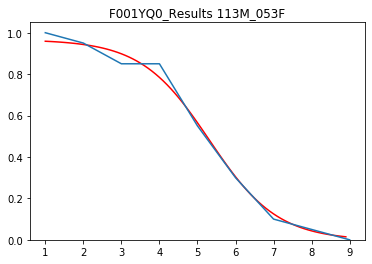

In [84]:
Point_of_subj_equ = []
slope_at_pose = []
names = []
counter = 0
outpath = "/Users/sararodriguez/Desktop/LAB/"
files= datafiles[0]
re.sub(r'Users', "", files[0])
subj = []
response_person_dic = []
max_slope = []

for i in datafiles[0]:
    plt.clf()
    name = datafiles[0][counter][33:-4]
    print(name)
    names.append(name)
    print(names)
    frame = pd.read_csv(i, skiprows = 1)
    male = frame.e.values
#     print len(male)
    continuum = frame.Stimula.values
#     print(continuum[0])
    # the following four specifications are for 5 repeats per stimulus
#     _63M_83F = male[:9]
#     _98M_056F = male[9:18]
#     _113M_053F = male[18:27]
#     _018M_019F = male[27:]
    # these specifications are for 20 reps per stim for 018M_019F and 098M_056F:
#     _018M_019F = male[:9]
    ###CHECK CSV FILE FOR THE ORDER OF THE CONTINUA IN IT BEFORE RUNNING THIS!!!
    _113M_053F = male[9:]
    _63M_83F = male[:9]
#     _098M_056F = male[9:]
#     print _63M_83F
    steps = frame.Continuum.values[9:] #change here to the value behind the continuum a few lines above
    popt, pcov = scipy.optimize.curve_fit(fitting, running_mean(steps,2), running_mean(_113M_053F, 2))#, bounds=(0,[10,1,1,inf])) #change name of continuum in this line
#     plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
#     plt.title(name)
    x0,L,R,slope = popt
    L = 1
    R = 0
    PosE = x0-slope*log((1-2*R)/(2*L-1)) #we are calculating this here in case L and R are not equal to 1 and 0
    Point_of_subj_equ.append(PosE)
    PosE_slope= 1/slope #-(1-2*L-2*R+4*L*R)/(4*L*slope-4*R*slope)
    slope_at_pose.append(PosE_slope)
    maxislope = slope
    max_slope.append(maxislope)
    new_str = re.sub(outpath + r'csvFile for ', "", i)
    subj.append(new_str)
    response_person_dic = {'subj': subj, 'PosE': Point_of_subj_equ, 'slope@PosE' : slope_at_pose, 'max slope' : max_slope}
    plotting(popt, steps, _113M_053F, continuum[9],name) #change continuum name here and number in braces after "continuum"
#     print(slope, PosE_slope)
    print(popt)
    counter +=1
    popt

In [85]:
dfname = 'results_113M_inlab.csv'

df_overview  = pd.DataFrame(response_person_dic)
df_overview.to_csv(dfname)
df_overview

,subj,PosE,slope@PosE,max slope
0,/Users/sararodriguez/Desktop/LAB/F001YQ0_Resul...,5.311259,1.114975,0.896881


In [86]:
pwd

'/Users/sararodriguez'

In [87]:
popt

array([ 5.31125919e+00,  9.66705340e-01, -2.98816466e-03,  8.96881201e-01])

In [88]:
Point_of_subj_equ

[5.3112591915865845]

In [95]:
mean(Point_of_subj_equ)

5.3112591915865845

In [96]:
slope_at_pose

[1.1149748700703013]

In [97]:
np.std(slope_at_pose)

0.0

In [98]:
# why is this zero?

In [99]:
def fitting(x, x0, L, R, slope):
    return L-((L-R)/(1+exp((-x+x0)/slope)))

In [100]:
continuum

array(['63M_83F', '63M_83F', '63M_83F', '63M_83F', '63M_83F', '63M_83F',
       '63M_83F', '63M_83F', '63M_83F', '113M_053F', '113M_053F',
       '113M_053F', '113M_053F', '113M_053F', '113M_053F', '113M_053F',
       '113M_053F', '113M_053F'], dtype=object)

In [101]:
# here we define the continuum and the steps (y-axis and x-axis)
_63M_83F = male[:9]
_63M_83F # why is there nothing here?
_98M_056F = male[9:18]
_113M_053F = male[18:27]
_018M019F = male[27:]


steps = frame.Continuum.values[:9]

In [102]:
steps

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
# _63M_83F
_98M_056F

array([1.  , 0.95, 0.85, 0.85, 0.55, 0.3 , 0.1 , 0.05, 0.  ])

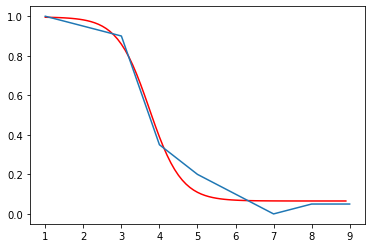

In [104]:
# L = _63M_83F[0]
# R = _63M_83F[-1]

#L and R need to be defined, otherwise it will throw an error
def fitting(x, x0, L, R, slope):
    return L-((L-R)/(1+exp((-x+x0)/slope)))

popt, pcov = scipy.optimize.curve_fit(fitting, steps, _63M_83F, bounds=(0,[10,1,1,inf]))
plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
plt.plot(steps, _63M_83F)

In [105]:
popt
# array([4.13626826e+00, 9.45463010e-01, 5.80828241e-33, 3.02949156e-01]) = point of subj equality, L, R, slope)

array([3.73596969, 0.99632033, 0.06540813, 0.42044539])

In [106]:
x0, L, R, slope = popt

In [107]:
# when L and R are not 1 and 0, x0 is not the point of subjective equality
# this function finds the point of subjective equality in this case and in the normal case 
# the only time it fails is if L and R are exactly 0.5
PosE = x0-slope*log((1-2*R)/(2*L-1))
PosE

3.7918107992682466

In [108]:
PosE_slope= -(1-2*L-2*R+4*L*R)/(4*L*slope-4*R*slope)
PosE_slope

0.5510935677351599

In [109]:
# this is the slope at x0. This is just for comparison.
1/4/slope

0.5946075421895224

In [110]:
x0

3.7359696879325455


['']
[3.7766257  1.02156275 0.04406976 0.65717077]


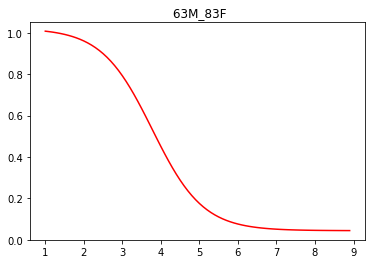

In [113]:
#new plotting function elimits the original data
def plottingallinone(popt, steps, continuum, continuumname, name):
    popt, pcov = scipy.optimize.curve_fit(fitting, running_mean(steps,2), running_mean(continuum,2))#, bounds=(0,[10,1,1,inf]))
    plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
    plt.ylim([0.0, 1.05])
    plt.title(name +" " +str(continuumname))
    plt.savefig(path.join(outpath, name + ' ' + str(continuumname + '.pdf'))) # + ' ' + str(continuum[0]), format='pdf')


Point_of_subj_equ = []
slope_at_pose = []
names = []
counter = 0
outpath = "/Users/sararodriguez/Desktop/LAB/"
files= datafiles[0]
re.sub(r'Users', "", files[0])
subj = []
response_person_dic = []
max_slope = []

for i in datafiles[0]:
#     plt.clf() #removed the "clear the plot" command
    name = datafiles[0][counter][137:-4]
    print(name)
    names.append(name)
    print(names)
    frame = pd.read_csv(i, skiprows = 1)
    male = frame.e.values
#     print len(male)
    continuum = frame.Stimula.values
#     print(continuum[0])
    # the following four specifications are for 5 repeats per stimulus
#     _63M_83F = male[:9]
#     _98M_056F = male[9:18]
#     _113M_053F = male[18:27]
#     _018M_019F = male[27:]
    # these specifications are for 20 reps per stim for 018M_019F and 098M_056F:
#     _018M_019F = male[:9]
    _113M_053F = male[9:]
    _63M_83F = male[:9]
#     _098M_056F = male[9:]
#     print _63M_83F
#     print _113M_053F
    steps = frame.Continuum.values[:9]
    popt, pcov = scipy.optimize.curve_fit(fitting, running_mean(steps, 2), running_mean(_63M_83F, 2))#, bounds=(0,[10,1,1,inf]))
#     plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
#     plt.title(name)
    x0,L,R,slope = popt
    L = 1
    R = 0
    PosE = x0-slope*log((1-2*R)/(2*L-1)) #we are calculating this here in case L and R are not equal to 1 and 0
    Point_of_subj_equ.append(PosE)
    PosE_slope= 1/slope #-(1-2*L-2*R+4*L*R)/(4*L*slope-4*R*slope)
    slope_at_pose.append(PosE_slope)
    maxislope = slope
    max_slope.append(maxislope)
    new_str = re.sub(outpath + r'csvFile for ', "", i)
    subj.append(new_str)
    response_person_dic = {'subj': subj, 'PosE': Point_of_subj_equ, 'slope@PosE' : slope_at_pose, 'max slope' : max_slope}
    plottingallinone(popt, steps, _63M_83F, continuum[0],name)
#     print(slope, PosE_slope)
    print(popt)
    counter +=1
    popt

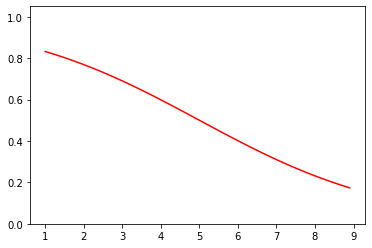

In [115]:
ap_mean = 0.4
conti = '113M_online'
popt = [5,1,0,1/ap_mean]
plt.plot(np.arange(1,9,0.1), fitting(np.arange(1,9,0.1), *popt), 'r-', label='fit')
plt.ylim([0.0, 1.05])
plt.savefig(path.join(outpath, 'artificial_AP_for' + conti + '.pdf')) # + ' ' + str(continuum[0]), format='pdf')

In [116]:
running_mean(steps, 2)
running_mean(continuum, 2)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [117]:
(datafiles[0][0])

'/Users/sararodriguez/Desktop/LAB/F001YQ0_Results.csv'